<a href="https://colab.research.google.com/github/prasannaNRI-degree/Python-Mini-Project/blob/main/House_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random

In [ ]:
# Introduction to ML
# used Library - random,numpy,pandas,

In [ ]:
# Terms in machine learning
# 1.collection:data used for training validating and testing the machine learning model

In [ ]:
# 2.Features(X):independent variable or input variables used to predict the target variable
# 3.target(r): Dependent variable output we want to predict
# Example: predicting number of bedrooms
# 4.training data:subset of dataset used to train the model
# 5.testing data:subset of dataset used to train the model
# 6.model: mathmatical representation of relationship between feature and target
# 7.supervised learning(SL): training the data based on labled data/ model learns from known/labelled data
# 8.regression: metho to predict continous values from a model supervised learning
# 9.overfitting: when a model learns from training data too well includes noise performs poorly new data
# 10.underfitting: model is too simpler and does not capture pattern in data

In [ ]:
# categories in machine learning
# 1.supervised learning:
# model learns from labeled data- 1\0 pairs
# examples: linear regression, decision trees random forest ,SVM
# best use case so for : house price prediction based on previous/historical data
# 2.unsupervised learning:
# model finds new patterns in unlabelled data without predefined data/labels
# example: clustering (k means) ,PCA
# use case: customer segmentation in marketing
# 3.reinforcement learning
# model learns by interacting with environment and receiving the reqrds or pendities
# example: deep  learning, alphago,...
# best use case: self car driving vehicles, self learning AI bots ,SLAM
# Example: predicting the house price random dataset - generated

In [ ]:
# Steps
# 1.generate a random dataset
# 2.train a ML model - linear regression
# 3.evaluate the model
# 4.make prediction

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
#step 1: Generate a random dataset
np.random.seed(42) # used to set same sequence of values for the random package
numsamples = 100

#create numSamples number of samples from (800,5000)
size= np.random.randint(800,5000,numsamples)
bedrooms = np.random.randint(1,6, numsamples)
washrooms= np.random.randint(1,8, numsamples)
localityscore = np.random.randint(1,10, numsamples)

#Genrate House prices with randomness
housePrice = (size*3000) + (bedrooms*50000) + (washrooms* 30000) + (localityscore*70000) + np.random.randint(-50000,50000, numsamples)

#create a Dataframe
df = pd.DataFrame(
      {
         'size':size,
         'Bedrooms': bedrooms,
         'washrooms': washrooms,
         'LocalityScore': localityscore,
         'price': housePrice
      }
)

In [ ]:
df

,size,Bedrooms,washrooms,LocalityScore,price
0,1660,5,2,9,5964758
1,4572,4,7,5,14517747
2,3892,5,7,8,12708752
3,1266,5,6,1,4304573
4,4244,3,2,5,13301101
...,...,...,...,...,...
95,1006,1,6,5,3591286
96,2284,3,5,1,7240450
97,1663,4,6,4,5620352
98,3590,1,3,5,11265069


In [ ]:
# Step 2 : Train a ML model - linear regression

# Package (installation) requirements:
# pip install scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
X=df[['size','Bedrooms','washrooms','LocalityScore']]
Y=df['price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,
random_state=42)

model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
# Step 3 : Evaluate the Model
# Package Requirements
# sklearn.metrics

from sklearn.metrics import mean_absolute_error, mean_squared_error

y_pred = model.predict(X_test)

MAE = mean_absolute_error(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(MSE)

print(f'Mean Absolute Error : {MAE}')
print(f'Mean Squared Error : {MSE}')
print(f'Root Mean Squared Error :   {RMSE}')

Mean Absolute Error : 25385.345481365337
Mean Squared Error : 796791448.4323988
Root Mean Squared Error :   28227.494547557686


In [ ]:
# Step 4 : Make prediction
newHouse = np.array([[4000,4,6,10]])
predictedPrice = model.predict(newHouse)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
print(f'The predicted prize of new house is {predictedPrice[0]}')

The predicted prize of new house is 13069094.887436867


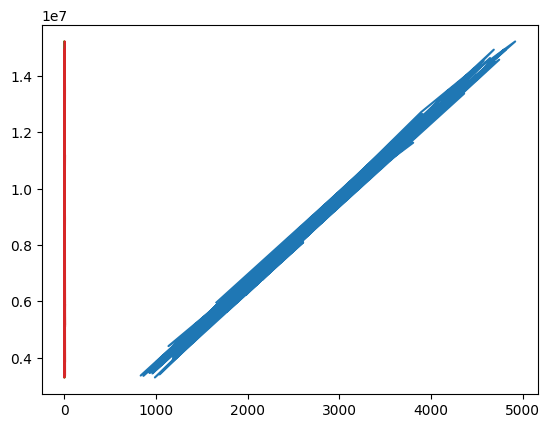

In [ ]:
plt.plot(X,Y)

<ipython-input-62-0c3e47b9bdf7>:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


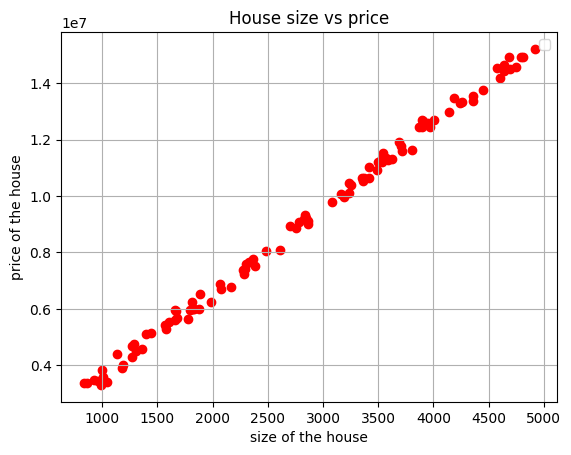

In [ ]:
plt.scatter(df['size'],df['price'],color='red')
plt.xlabel('size of the house')
plt.ylabel('price of the house')
plt.legend()
plt.grid(True)
plt.title('House size vs price')
plt.show()

In [ ]:
Xsorted = np.sort(X,axis=0)
yPred = model.predict(Xsorted)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


<ipython-input-78-19dc31faef1a>:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


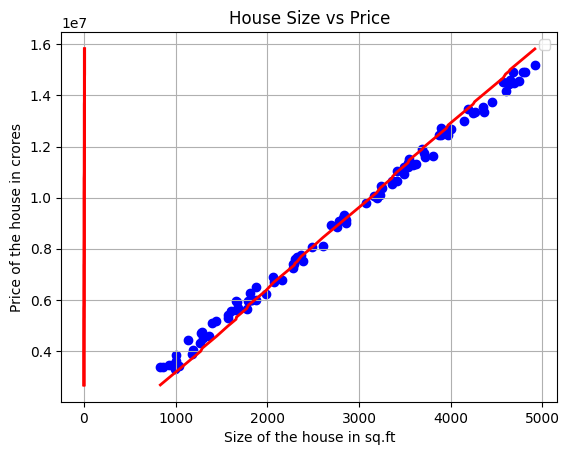

In [ ]:
plt.scatter(df['size'],df['price'],color='blue')
plt.plot(Xsorted,yPred,color='red',linewidth= 2)
plt.xlabel('Size of the house in sq.ft')
plt.ylabel('Price of the house in crores')
plt.legend()
plt.grid(True)
plt.title('House Size vs Price')
plt.show()